<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 2</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistente: Sebastián Calcagno <p>
</div>

API no oficial de Google Trends. Para mantener siempre los mismos datos, en este ejercicio no se uso la api pero dejo la documentacion para que puedan obtener mayor meterial

 https://pypi.org/project/pytrends/

Fuente de los datos usados=
https://trends.google.com/trends/explore?date=today%203-m&geo=AR&q=cataratas&hl=es <br> *Google Trends ofrece una variedad de datos y herramientas útiles para analizar la popularidad de términos de búsqueda a lo largo del tiempo.*



En este ejercicio nos vamos a guiar por la **metodología de Box-Jenkins** consta de tres pasos principales: identificación, estimación y diagnóstico. A continuacion, van a ver los diferentes pasos a seguir con sus respectivos ejemplos

In [ ]:
# Comenzamos cargando las librerias para poder trabajar en el ejemplo
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.stattools import acf
from scipy.stats import chi2

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Rechazar la hipótesis nula")
    print("Los datos son estacionarios.")
  else:
    print("Conclusion:====>")
    print("No rechazar la hipótesis nula")
    print("Los datos no son estacionarios.")

In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/multiTimelineCataratas.csv'
dataoriginal = pd.read_csv(url)

In [ ]:
dataoriginal.dtypes

,0
Dia,object
Cataratas,int64


<title>Paso 1</title>

Graficar los datos, identificar patrones y/o comportamientos inusuales. Una aproximacion visual permite identificar varias caracteristicas de las series, si bien no es determinante siempre es necesario saber como son nuestras bases a trabajar

In [ ]:
dataoriginal.head()

,Dia,Cataratas
0,3/4/2024,61
1,3/5/2024,55
2,3/6/2024,55
3,3/7/2024,71
4,3/8/2024,46


In [ ]:
dataoriginal['Dia'] = pd.to_datetime(dataoriginal['Dia'])
dataoriginal.index = dataoriginal['Dia']
del dataoriginal['Dia']

In [ ]:
dataoriginal.head()

,Cataratas
Dia,
2024-03-04,61
2024-03-05,55
2024-03-06,55
2024-03-07,71
2024-03-08,46


In [ ]:
dataoriginal.dtypes

,0
Cataratas,int64


In [ ]:
dataoriginal=dataoriginal.asfreq('d')
dataoriginal.head()

,Cataratas
Dia,
2024-03-04,61
2024-03-05,55
2024-03-06,55
2024-03-07,71
2024-03-08,46


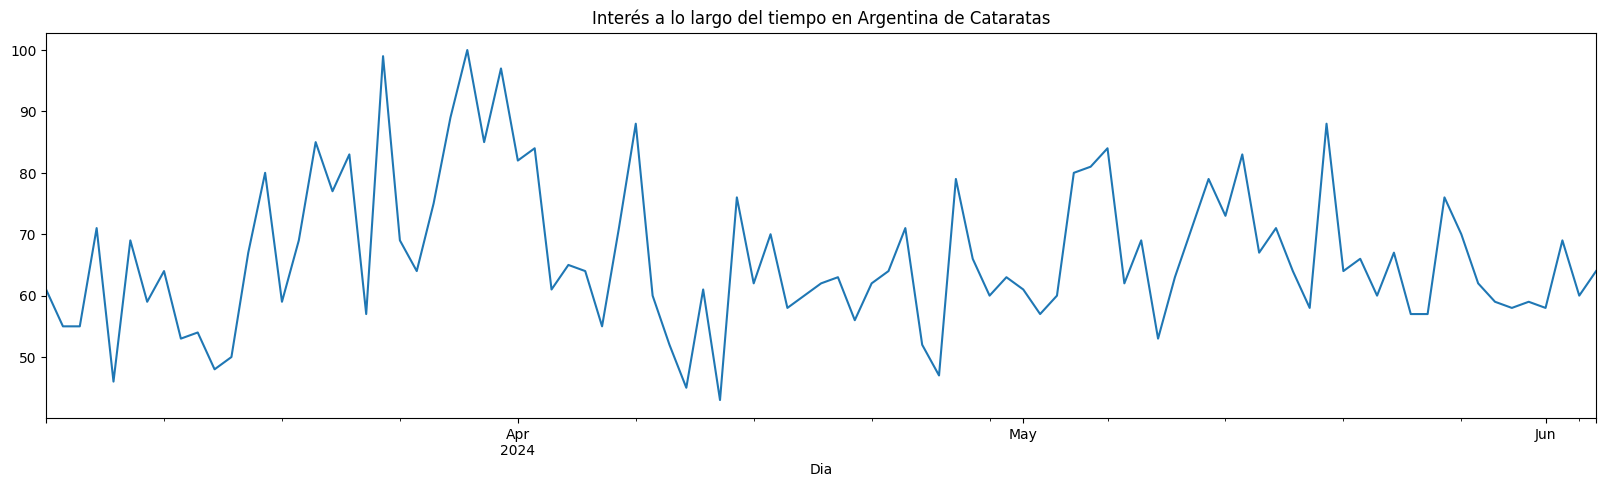

In [ ]:
dataoriginal.Cataratas.plot(figsize=(20,5), title = "Interés a lo largo del tiempo en Argentina de Cataratas")
plt.show()

<title>Paso 2</title>

Si es necesario utilizar transformacion de Box-Cox para estabilizar la varianza. Aquí se propone una transformación de los datos a fin de mejorar la homocedasticidad. Estas transformaciones se usan para estabilizar la varianza y produce que las desviaciones alrededor del modelo sean mas normalmente distribuidas

In [ ]:
#cargar los paquetes necesarios
from scipy.stats import jarque_bera, shapiro, boxcox, probplot

In [ ]:
# realizar la transformación de Box-Cox en datos originales
transform_data, best_lambda = boxcox (dataoriginal.Cataratas)

In [ ]:
print(f" El lambda óptima aproximado es =  {best_lambda}")

 El lambda óptima aproximado es =  -0.44831880714163186


In [ ]:
print(f" El array resultante luego de la transformacion de box-cox es =  {transform_data}")

 El array resultante luego de la transformacion de box-cox es =  [1.87735928 1.8605777  1.8605777  1.9005972  1.82971888 1.89634326
 1.872041   1.88488005 1.85438244 1.85752161 1.83729445 1.84442617
 1.89190688 1.91778776 1.872041   1.89634326 1.92617404 1.91238221
 1.92290744 1.866455   1.94628474 1.89634326 1.88488005 1.908606
 1.93238493 1.94756272 1.92617404 1.94367182 1.92123106 1.92455482
 1.87735928 1.88727445 1.88488005 1.8605777  1.9005972  1.93087062
 1.87473223 1.85115629 1.82574969 1.87735928 1.81741443 1.9105121
 1.87992468 1.89849223 1.86928287 1.87473223 1.87992468 1.88243085
 1.86355435 1.87992468 1.88488005 1.9005972  1.85115629 1.83356503
 1.91601899 1.88961608 1.87473223 1.88243085 1.87735928 1.866455
 1.87473223 1.91778776 1.9195248  1.92455482 1.87992468 1.89634326
 1.85438244 1.88243085 1.9005972  1.91601899 1.90468106 1.92290744
 1.89190688 1.9005972  1.88488005 1.86928287 1.93087062 1.88488005
 1.88961608 1.87473223 1.89190688 1.866455   1.866455   1.9105121
 1.

In [ ]:
# Para datos con transformacion de Box Cox
jarque_bera(transform_data)

SignificanceResult(statistic=0.03295869920803751, pvalue=0.9836556920604895)

In [ ]:
# Para datos originales
jarque_bera(dataoriginal.Cataratas)

SignificanceResult(statistic=7.471959995304841, pvalue=0.023849786877241718)

# Usamos algoritmos automatizados
- Usamos Auto arima para encontrar el mejor modelo de series de tiempo.

In [ ]:
len(dataoriginal)

93

In [ ]:
X = dataoriginal[['Cataratas' ]]
train, test = X[0:-24], X[-24:]
X.head()

,Cataratas
Dia,
2024-03-04,61
2024-03-05,55
2024-03-06,55
2024-03-07,71
2024-03-08,46


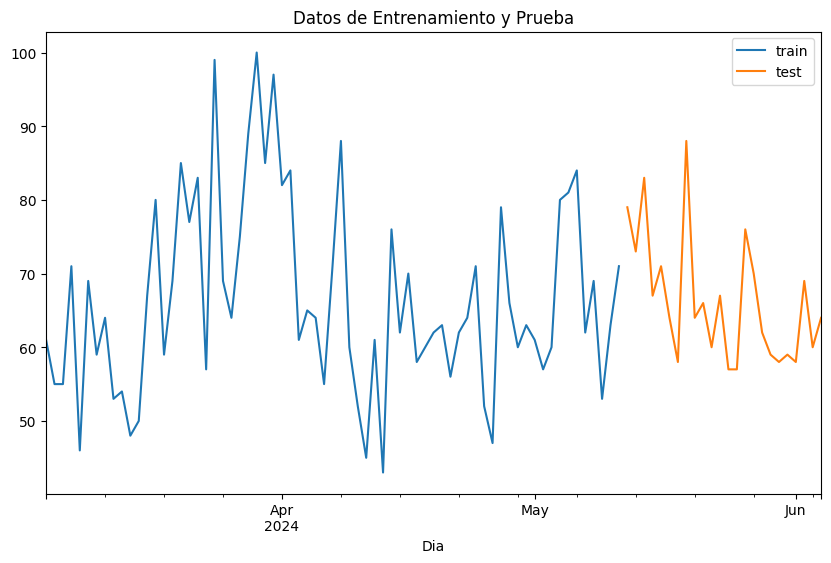

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
train.plot(ax=ax)
test.plot(ax=ax)
plt.title("Datos de Entrenamiento y Prueba")
plt.legend(['train', 'test'])
plt.show()

In [ ]:
train

,Cataratas
Dia,
2024-03-04,61
2024-03-05,55
2024-03-06,55
2024-03-07,71
2024-03-08,46
...,...
2024-05-07,62
2024-05-08,69
2024-05-09,53


In [ ]:
test

,Cataratas
Dia,
2024-05-12,79
2024-05-13,73
2024-05-14,83
2024-05-15,67
2024-05-16,71
2024-05-17,64
2024-05-18,58
2024-05-19,88
2024-05-20,64


In [ ]:
stepwise_fit = auto_arima(train, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=547.874, Time=1.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=553.929, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=546.165, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=549.648, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=779.461, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=544.415, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=546.420, Time=0.73 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=546.412, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=544.556, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=548.412, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 3.353 seconds


# Por otro lado, se puede seleccionar el modelo de forma no automatica

3 . Si es necesario, diferenciamos los datos hasta que sean estacionarios. Usar el test de raiz unitaria para comprobar lo dicho.

El test de Dickey Fuller, pone a prueba la estacionariedad de la serie. Es decir, que la raiz sea o no estacionaria. La presencia de estacionariedad es cuando las raices son en modulo mayores que uno.
Regla de decision =

De los modelos AR(p)
- Si el "p-value" es menor a 0.05 --> Rechazo H0
- Si el "p-value" es mayor a 0.05 --> No Rechazo H0

Donde =

<h5>H0 --> no estacionario</h5>
<h5>H1  --> Estacionario</h5>

Tengan en cuenta que esto es solo una introduccion del test

In [ ]:
Augmented_Dickey_Fuller_Test_func(train['Cataratas'],'Cataratas')

Resultados de la prueba de Dickey-Fuller para columna: Cataratas
Test Statistic                 -5.539513
p-value                         0.000002
No Lags Used                    0.000000
Number of Observations Used    68.000000
Critical Value (1%)            -3.530399
Critical Value (5%)            -2.905087
Critical Value (10%)           -2.590001
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios.


4. Graficamos las funciones de autocorrelacion y autocorrelacion parcial para determinar los posibles modelos.

La funcion de autocorrelacion nos da la pauta, cuando estamos trabajando con un modelo AR(p) si la serie es o no es estacionaria.
Por otro lado, la funcion de autocorrelacion parcial, nos indica el orden del modelo Autoregresivo.

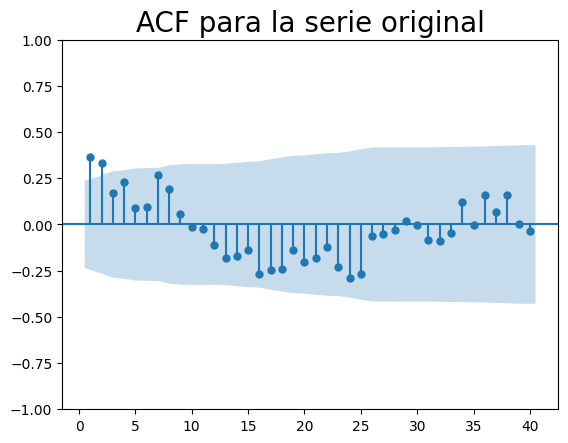

In [ ]:
sgt.plot_acf(train.Cataratas, zero = False, lags = 40)
plt.title("ACF para la serie original", size = 20)
plt.show()

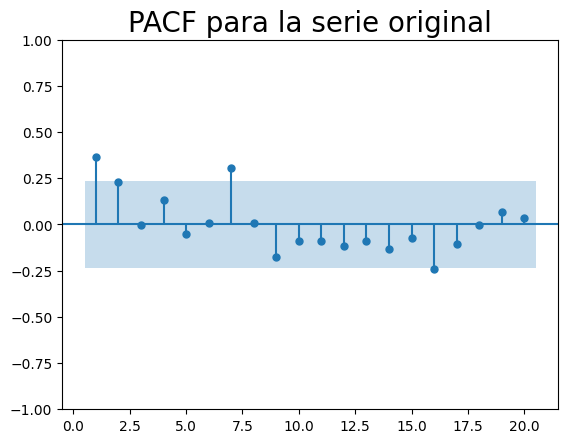

In [ ]:
sgt.plot_pacf(train.Cataratas, lags = 20, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

5. Realizamos una preselección del modelo, y luego verificamos el mejor modelo a través de los criterios de informacion.

In [ ]:
# Modelo 1

import statsmodels.api as sm
modeloAR2 = sm.tsa.arima.ARIMA(train.Cataratas, order=(2,0,0))
resultAR2 = modeloAR2.fit()

resultAR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Cataratas   No. Observations:                   69
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -268.207
Date:                Tue, 01 Oct 2024   AIC                            544.415
Time:                        23:58:30   BIC                            553.351
Sample:                    03-04-2024   HQIC                           547.960
                         - 05-11-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3129      3.160     20.984      0.000      60.119      72.507
ar.L1          0.2773      0.116      2.386      0.017       0.050       0.505
ar.L2          0.2285      0.112      2.045      0.041       0.009       0.447
sigma2       138.7534     29.351      4.727      0.000      81.227     196.280
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.61
Prob(Q):                              0.97   Prob(JB):                         0.16
Heteroskedasticity (H):               0.63   Skew:                             0.52
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(f"La raiz REAL del modelo condicionado a un AR(2)  es= {resultAR2.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

La raiz REAL del modelo condicionado a un AR(2)  es= [ 1.57151711 -2.78523982] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [ ]:
# Modelo 2

modeloAR2_16 = sm.tsa.arima.ARIMA(train.Cataratas, order=((1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1),0,0))
resultAR2_16 = modeloAR2_16.fit()

resultAR2_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                Cataratas   No. Observations:                   69
Model:             ARIMA([1, 16], 0, 0)   Log Likelihood                -267.811
Date:                  Wed, 02 Oct 2024   AIC                            543.621
Time:                          00:00:03   BIC                            552.558
Sample:                      03-04-2024   HQIC                           547.167
                           - 05-11-2024                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.8999      1.693     39.513      0.000      63.581      70.218
ar.L1          0.3232      0.109      2.972      0.003       0.110       0.536
ar.L16        -0.2505      0.098     -2.559      0.010      -0.442      -0.059
sigma2       135.1011     28.971      4.663      0.000      78.318     191.884
===================================================================================
Ljung-Box (L1) (Q):                   0.57   Jarque-Bera (JB):                 2.65
Prob(Q):                              0.45   Prob(JB):                         0.27
Heteroskedasticity (H):               0.69   Skew:                             0.40
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Paso 6. Analizamos los residuos del modelo

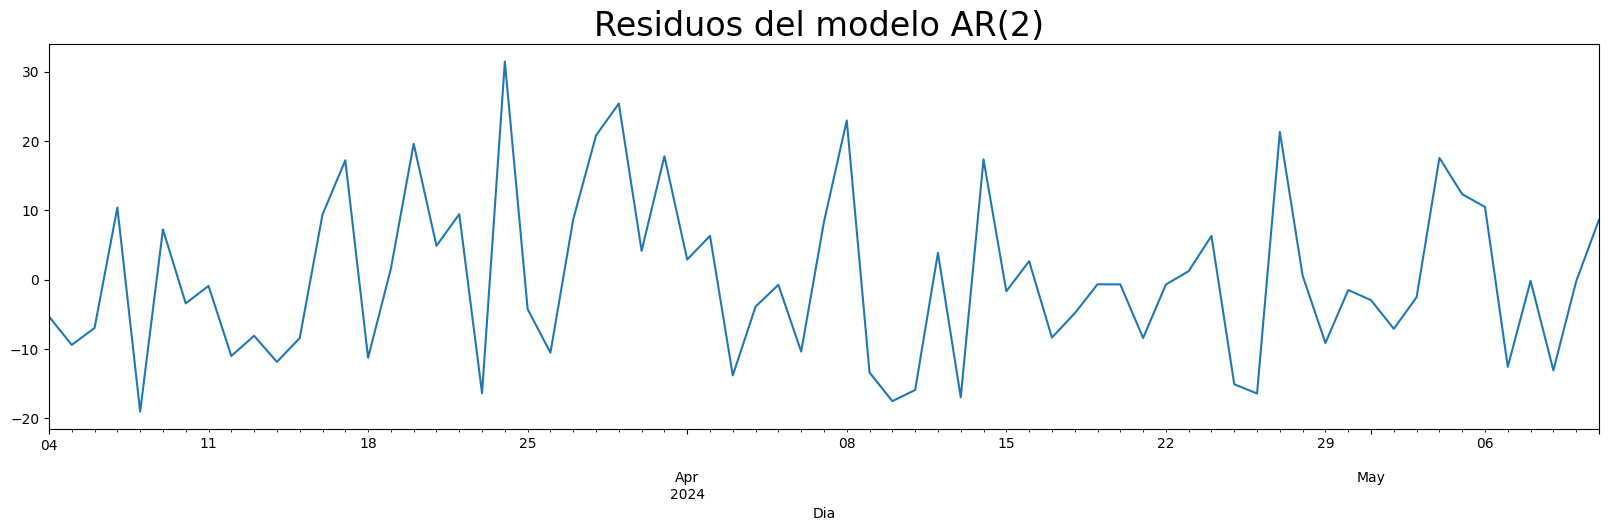

In [ ]:
resultAR2.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo AR(2) ",size=24)
plt.show()

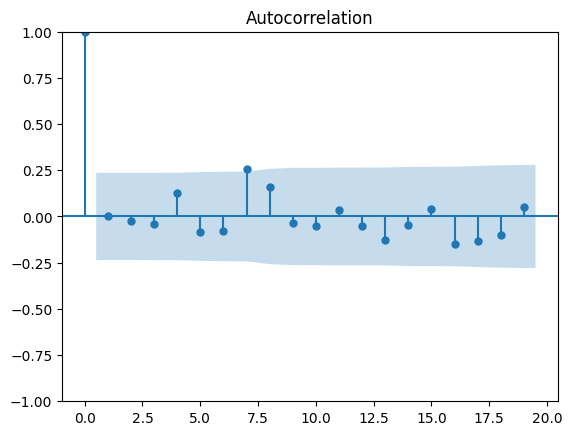

In [ ]:
plot_acf(resultAR2.resid);

In [ ]:
import statsmodels.api as sm

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(resultAR2.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.001736,0.966768
2,0.041973,0.979232
3,0.153423,0.984733
4,1.397076,0.844703
5,1.949241,0.856123
6,2.446121,0.874448
7,7.619778,0.367312
8,9.627305,0.292164
9,9.738714,0.372049
10,9.939534,0.445814


Text(0, 0.5, 'P-valores ')

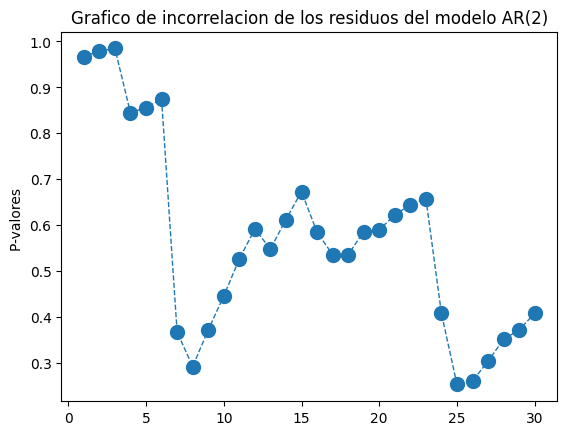

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo AR(2)")
plt.ylabel("P-valores ")

In [ ]:
# Test Box-Pierce
lags = 10

acf_values = acf(resultAR2.resid, nlags=lags, fft=False)

In [ ]:
# Calculamos el estadistico de prueba Q de Box-Pierce
n = len(resultAR2.resid)
Q = n * np.sum(np.square(acf_values[1:lags+1]))
p_value = 1 - chi2.cdf(Q, df=lags)

In [ ]:
print(f'Estadística de prueba (Q): {Q:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.")
else:
    print("No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.")

Estadística de prueba (Q): 8.7241
Valor p: 0.5585
No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.


Paso 7. ¿ los residuos se comportan como ruido blanco ? Si es afirmativo ---> Prediccion

In [ ]:
# Pasamos a la prediccion
forecastAR2 = resultAR2.get_forecast(steps=24)

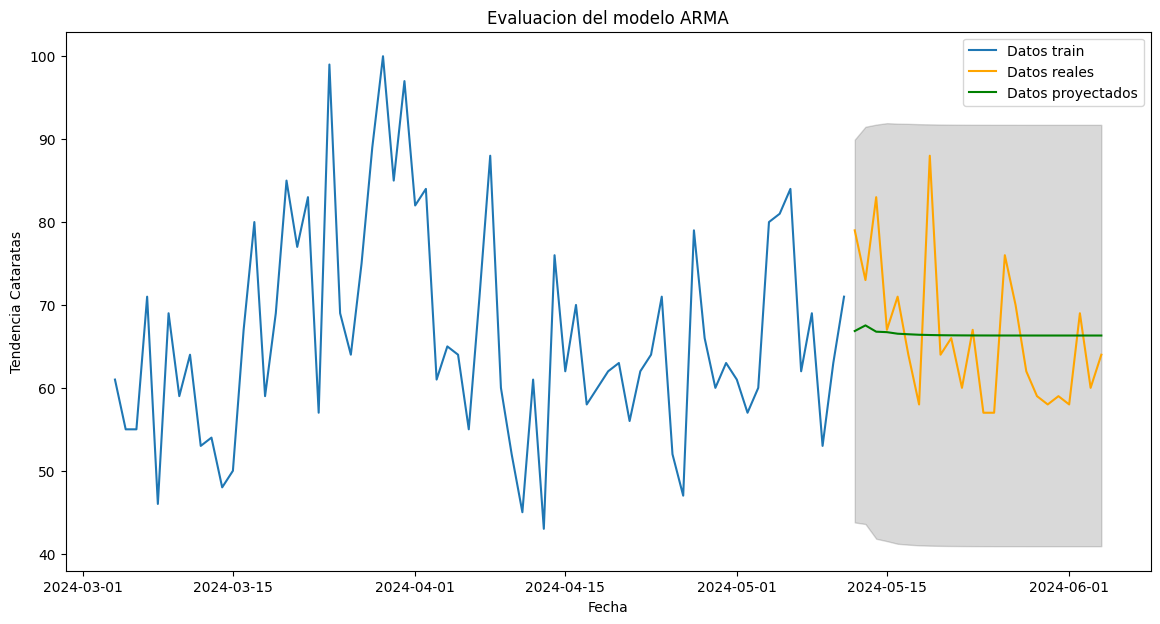

RMSE: 8.287702238893573


In [ ]:
test_forecast_series = pd.Series(forecastAR2.predicted_mean, index=test.index)

mse = mean_squared_error(test['Cataratas'], test_forecast_series)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train['Cataratas'], label='Datos train')
plt.plot(test['Cataratas'], label='Datos reales', color='orange')
plt.plot(test_forecast_series, label='Datos proyectados', color='green')
plt.fill_between(test.index,
                 forecastAR2.conf_int().iloc[:, 0],
                 forecastAR2.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo ARMA')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

Repito pasos 6 y 7 para el modelo 2 ( modelo con mejor criterio de informacion )

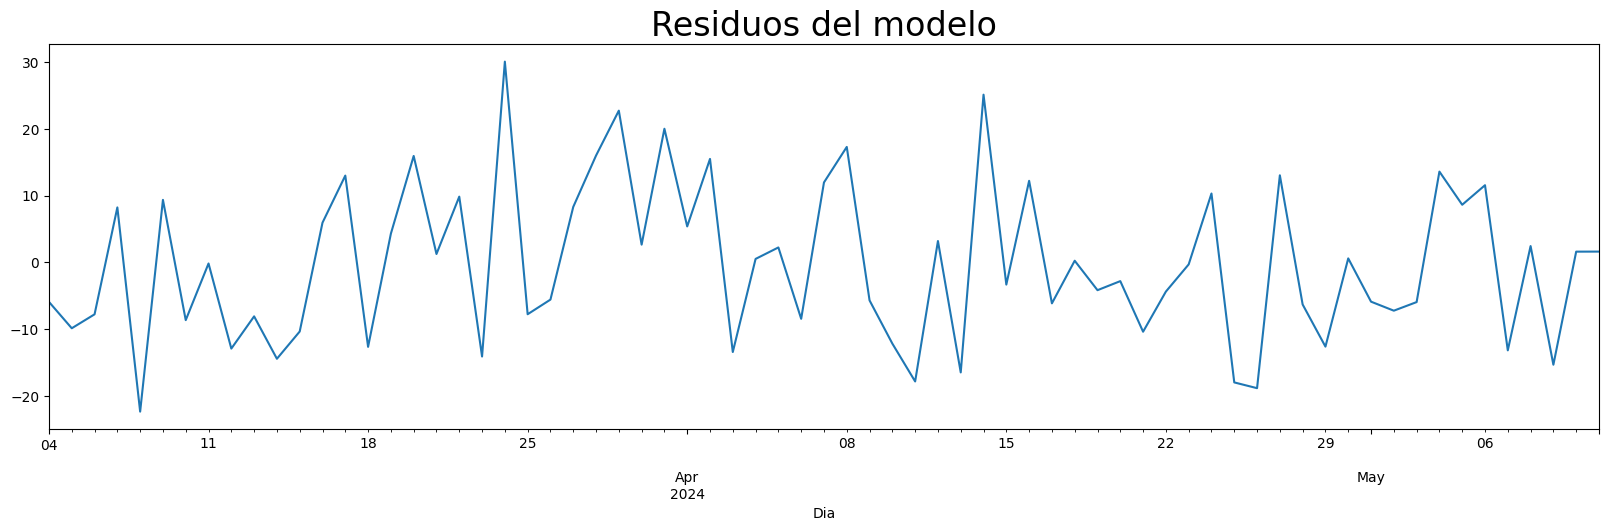

In [ ]:
resultAR2_16.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()


In [ ]:
# defino diferentes variables para realizar analisis manual de la funcion de autocorrelaion

T = resultAR2_16.resid.shape[0]  # número de datos
M = 12   # máximo número de rezagos que elijo
rezagos = np.arange(1, M+1)
alpha = 0.05  # significancia de los test

print(rezagos)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
rho = sm.tsa.acf(resultAR2_16.resid, fft=True, nlags=M)[1:]
rho
# Aqui vemos si los numeros son grandes o pequeños.
# Si son grandes es evidencia en contra de que los rezagos son ruido blanco ( si son pequeños es una evidencia, a favor del ruido blanco).

array([-0.08932832,  0.17793801, -0.053122  ,  0.15571852, -0.05225069,
       -0.02576546,  0.2107901 ,  0.11666283,  0.01844008, -0.00581387,
        0.01638793, -0.02177018])

In [ ]:
resumen2 = pd.DataFrame({'AC':rho}, index=rezagos)
resumen2.index.name = 'Rezagos'

resumen2.round(4)

,AC
Rezagos,
1,-0.0893
2,0.1779
3,-0.0531
4,0.1557
5,-0.0523
6,-0.0258
7,0.2108
8,0.1167
9,0.0184


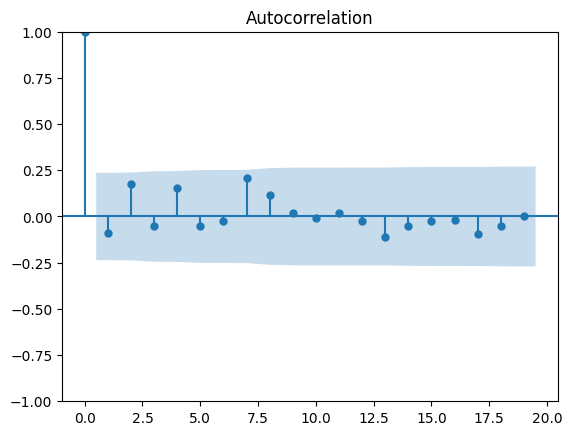

In [ ]:
plot_acf(resultAR2_16.resid);

In [ ]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(resultAR2_16.resid, lags=30)

In [ ]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.574880,0.448326
2,2.889981,0.235748
3,3.099447,0.376545
4,4.927019,0.294868
5,5.136003,0.399509
6,5.187626,0.519984
7,8.698507,0.275033
8,9.791563,0.279961
9,9.819327,0.365309
10,9.822134,0.456234


Text(0, 0.5, 'P-valores ')

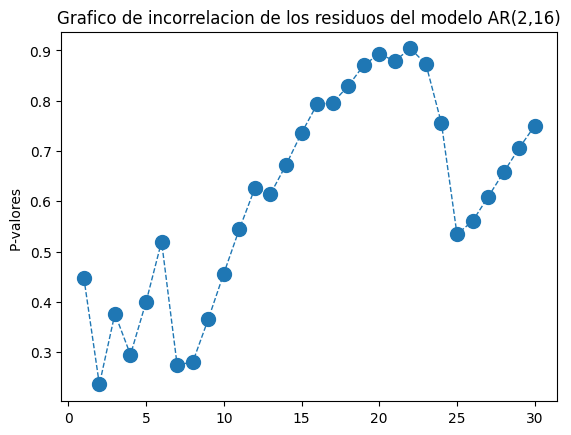

In [ ]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo AR(2,16)")
plt.ylabel("P-valores ")

In [ ]:
# Test Box-Pierce

lags = 10
acf_values = acf(resultAR2_16.resid, nlags=lags, fft=False)

# Calcular la estadística de prueba Q de Box-Pierce
n = len(resultAR2_16.resid)
Q = n * np.sum(np.square(acf_values[1:lags+1]))
p_value = 1 - chi2.cdf(Q, df=lags)



In [ ]:
print(f'Estadística de prueba (Q): {Q:.4f}')
print(f'Valor p: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay autocorrelación significativa en los residuos.")
else:
    print("No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.")

Estadística de prueba (Q): 8.8680
Valor p: 0.5447
No se rechaza la hipótesis nula: no hay autocorrelación significativa en los residuos.


# Pasamos a la proyeccion

In [ ]:
forecastAR2_16 = resultAR2_16.get_forecast(steps=24)

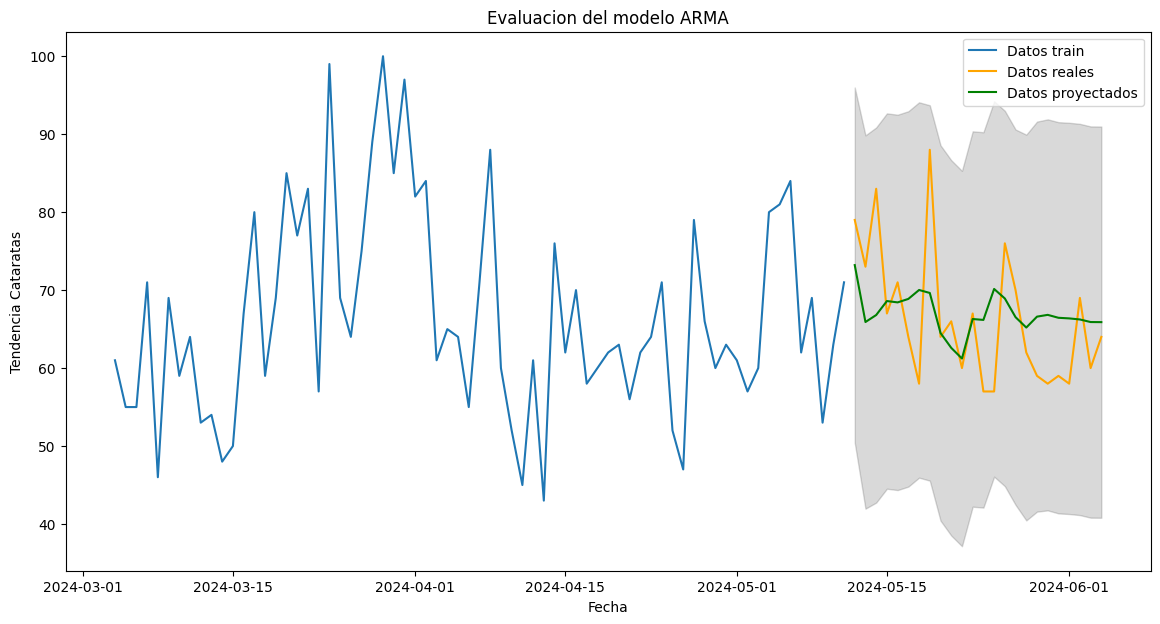

RMSE: 7.935367065851912


In [ ]:

test_forecast_series = pd.Series(forecastAR2_16.predicted_mean, index=test.index)


mse = mean_squared_error(test['Cataratas'], test_forecast_series)
rmse = mse**0.5


plt.figure(figsize=(14,7))
plt.plot(train['Cataratas'], label='Datos train')
plt.plot(test['Cataratas'], label='Datos reales', color='orange')
plt.plot(test_forecast_series, label='Datos proyectados', color='green')
plt.fill_between(test.index,
                 forecastAR2_16.conf_int().iloc[:, 0],
                 forecastAR2_16.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.title('Evaluacion del modelo ARMA')
plt.xlabel('Fecha')
plt.ylabel('Tendencia Cataratas')
plt.legend()
plt.show()

print('RMSE:', rmse)

FIN DEL CODIGO